In [1]:
from scipy import optimize
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
A_true, B_true, x0_true = prms = (1, 0.4, 3)
noise_lev = 0.5
xs = np.linspace(0, 6, 1024)

def model(A, B, x0):
    return A * np.cos(2*np.pi*(xs - x0)) + B * (xs - x0)**2

ys_noiseless = model(*prms)
ys = ys_noiseless + np.random.normal(scale=noise_lev, size=xs.size)

<IPython.core.display.Javascript object>


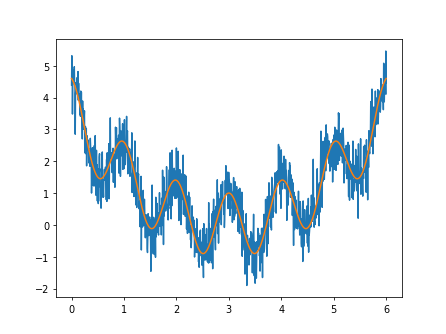

In [3]:
plt.figure()
plt.plot(xs, ys)
plt.plot(xs, ys_noiseless)

In [4]:
A_guess, B_guess, x0_guess = prms_guess = (1, 0.2, 0.1)
#A_guess, B_guess, x0_guess = prms_guess = (1, 0.2, 2.6)

prms_trace = []

def chisq(prms):
    prms_trace.append(prms)
    return np.sum(np.abs(ys - model(*prms))**2) / noise_lev**2 / (xs.size - 3)


A_sol, B_sol, x0_sol = prm_sol = optimize.fmin(chisq, prms_guess)
print(prm_sol)

Optimization terminated successfully.
         Current function value: 6.602134
         Iterations: 77
         Function evaluations: 143
[1.06183406 0.06864613 0.01758514]


<IPython.core.display.Javascript object>


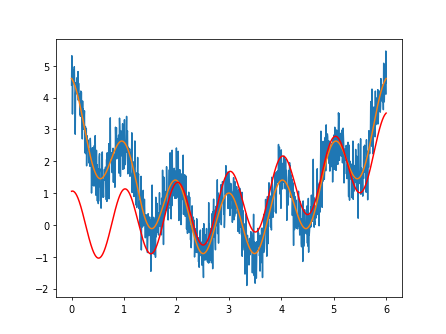

In [5]:
plt.figure()
plt.plot(xs, ys)
plt.plot(xs, ys_noiseless)
plt.plot(xs, model(*prm_sol), 'r')

In [6]:
Bs = np.linspace(0, 1, 100)
x0s = np.linspace(-1, 5, 100)
chisqs = np.array([chisq((1,_b,_x0)) for _b in Bs for _x0 in x0s])
chisqs.shape = (Bs.size, x0s.size)

<IPython.core.display.Javascript object>


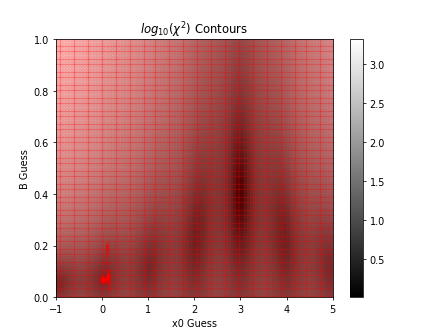

In [7]:
plt.figure()
plt.imshow(np.log10(chisqs),
           extent=(x0s[0], x0s[-1], Bs[0], Bs[-1]),
           aspect='auto',
           origin='lower',
           interpolation='nearest',
           cmap='gray'
)
#plt.arrow(x0_guess, B_guess, x0_sol - x0_guess, B_sol - B_guess, color='r', width=0.01)
plt.plot([prm[2] for prm in prms_trace], [prm[1] for prm in prms_trace], 'r.', alpha=0.2)
plt.title('$log_{10}(\chi^2)$ Contours')
plt.xlabel('x0 Guess')
plt.ylabel('B Guess')
_ = plt.colorbar()